In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import *
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 

In [2]:
df1=pd.read_excel("Data_Train.xlsx")
df1
df2=pd.read_excel("Test_set.xlsx")
com=[df1,df2]
pd.set_option('display.max_columns', None)
df2


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [3]:
for df in com:
    df.drop("Additional_Info",inplace=True,axis=1)
    df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
    df["month"]=pd.DatetimeIndex(df["Date_of_Journey"]).month
    df["day"]=pd.DatetimeIndex(df["Date_of_Journey"]).day
    df["week"]=df["Date_of_Journey"].dt.dayofweek
com=[df1,df2]

df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,month,day,week
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,6,6,3
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,12,5,3
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,5,21,1
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5,21,1
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,6,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,6,6,3
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,3,27,2
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,6,3,0
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,6,3,0


In [4]:
for train_data in com:
    duration = list(train_data["Duration"])
    
    for i in range(len(duration)):
        if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
            else:
                duration[i] = "0h " + duration[i]           # Adds 0 hour
    
    duration_hours = []
    duration_mins = []
    for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
        
    train_data["Duration_hours"] = duration_hours
    train_data["Duration_mins"] = duration_mins
    train_data["Duration"] = train_data["Duration_mins"]+60*(train_data["Duration_hours"])
    train_data.drop(["Duration_hours","Duration_mins"],inplace=True,axis=1) 
    
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,month,day,week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,3897,3,24,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,7662,1,5,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,13882,9,6,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,6218,12,5,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,13302,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,4107,9,4,2
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,4145,4,27,5
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,7229,4,27,5
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,12648,1,3,3


In [5]:
com=[df1,df2]
for df in com:
    df.drop("Date_of_Journey",axis=1, inplace=True)
    df.drop("Arrival_Time",axis=1, inplace=True)
df1

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Price,month,day,week
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,170,non-stop,3897,3,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,445,2 stops,7662,1,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,1140,2 stops,13882,9,6,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,325,1 stop,6218,12,5,3
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,285,1 stop,13302,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,150,non-stop,4107,9,4,2
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,155,non-stop,4145,4,27,5
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,180,non-stop,7229,4,27,5
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,160,non-stop,12648,1,3,3


In [6]:
com=[df1,df2]


In [7]:
Airline = df1[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
sor = df1[["Source"]]
sor = pd.get_dummies(sor, drop_first= True)
dest = df1[["Destination"]]
dest = pd.get_dummies(dest, drop_first= True)
df1=pd.concat([df1,Airline,sor,dest],axis=1)
Airline = df2[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
sor = df2[["Source"]]
sor = pd.get_dummies(sor, drop_first= True)
dest = df2[["Destination"]]
dest = pd.get_dummies(dest, drop_first= True)
df2=pd.concat([df2,Airline,sor,dest],axis=1)
df1.drop(["Airline","Source","Destination","Dep_Time","Route"],inplace=True,axis=1)
df2.drop(["Airline","Source","Destination","Dep_Time","Route"],inplace=True,axis=1)
df1.head()

,Duration,Total_Stops,Price,month,day,week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,non-stop,3897,3,24,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2 stops,7662,1,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2 stops,13882,9,6,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1 stop,6218,12,5,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1 stop,13302,1,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
df1[["Destination_Cochin","Destination_Delhi","Destination_Hyderabad","Destination_Kolkata","Destination_New Delhi"]].mean()

Destination_Cochin       0.424693
Destination_Delhi        0.118412
Destination_Hyderabad    0.065244
Destination_Kolkata      0.035664
Destination_New Delhi    0.087241
dtype: float64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Duration                                   10683 non-null  int64 
 1   Total_Stops                                10682 non-null  object
 2   Price                                      10683 non-null  int64 
 3   month                                      10683 non-null  int64 
 4   day                                        10683 non-null  int64 
 5   week                                       10683 non-null  int64 
 6   Airline_Air India                          10683 non-null  uint8 
 7   Airline_GoAir                              10683 non-null  uint8 
 8   Airline_IndiGo                             10683 non-null  uint8 
 9   Airline_Jet Airways                        10683 non-null  uint8 
 10  Airline_Jet Airways Business      

In [10]:
df1.dropna(inplace=True)
df1.info()
df1["Total_Stops"].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Duration                                   10682 non-null  int64 
 1   Total_Stops                                10682 non-null  object
 2   Price                                      10682 non-null  int64 
 3   month                                      10682 non-null  int64 
 4   day                                        10682 non-null  int64 
 5   week                                       10682 non-null  int64 
 6   Airline_Air India                          10682 non-null  uint8 
 7   Airline_GoAir                              10682 non-null  uint8 
 8   Airline_IndiGo                             10682 non-null  uint8 
 9   Airline_Jet Airways                        10682 non-null  uint8 
 10  Airline_Jet Airways Business      

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [11]:
df1["Total_Stops"]=df1["Total_Stops"].map({'non-stop':0,  '1 stop':1,'2 stops':2, '3 stops':3,  '4 stops':4})
df2["Total_Stops"]=df2["Total_Stops"].map({'non-stop':0,  '1 stop':1,'2 stops':2, '3 stops':3,  '4 stops':4})
df1

,Duration,Total_Stops,Price,month,day,week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,3,24,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,9,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,155,0,4145,4,27,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,180,0,7229,4,27,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,160,0,12648,1,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [12]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Duration                                   10682 non-null  int64
 1   Total_Stops                                10682 non-null  int64
 2   Price                                      10682 non-null  int64
 3   month                                      10682 non-null  int64
 4   day                                        10682 non-null  int64
 5   week                                       10682 non-null  int64
 6   Airline_Air India                          10682 non-null  uint8
 7   Airline_GoAir                              10682 non-null  uint8
 8   Airline_IndiGo                             10682 non-null  uint8
 9   Airline_Jet Airways                        10682 non-null  uint8
 10  Airline_Jet Airways Business               106

AxesSubplot(0.125,0.125;0.775x0.755)


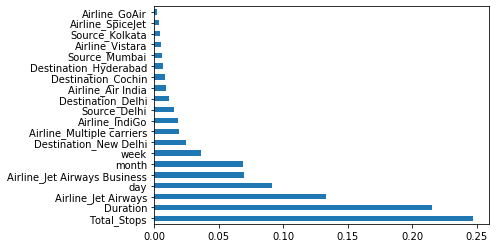

In [13]:
y=df1["Price"]
X=df1.drop("Price",axis=1)
from sklearn.ensemble import ExtraTreesRegressor
mod=ExtraTreesRegressor()
mod.fit(X,y)

fet_imp=pd.Series(mod.feature_importances_,index=X.columns)
print(fet_imp.nlargest(20).plot(kind='barh'))

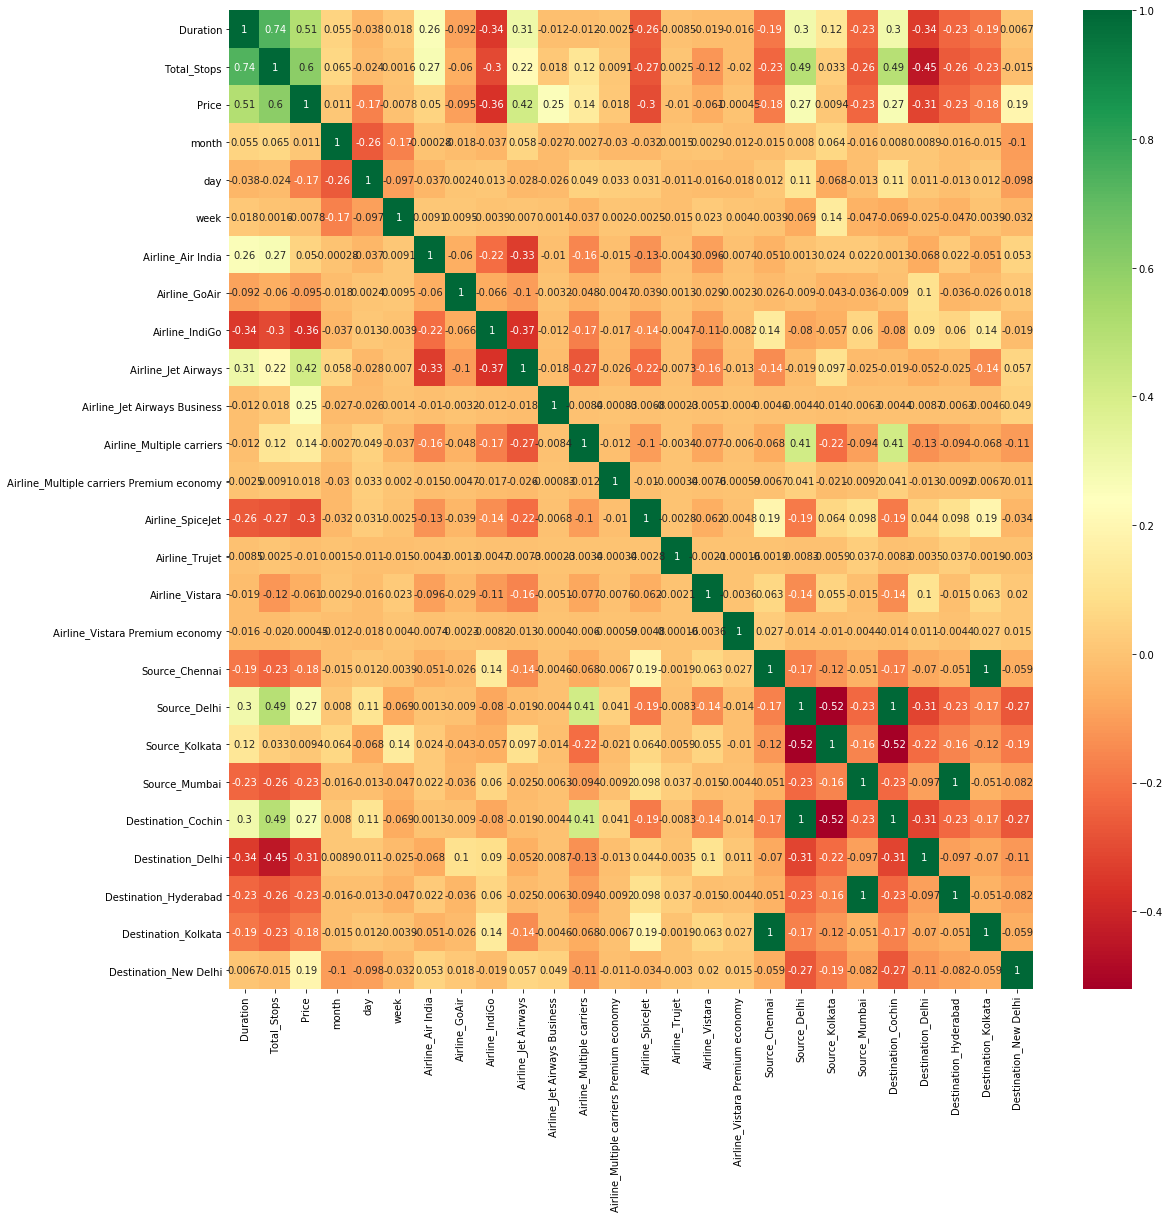

In [14]:

plt.figure(figsize = (18,18))
sns.heatmap(df1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
from sklearn import metrics
#k=rf_random.predict(X_test)

metrics.r2_score(y_test, y_pred)
#reg_rf.score(, y_train)

0.7678828745490953

In [16]:
reg_rf.score(X_test, y_test)

0.7678828745490953

In [17]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [18]:

k=rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


In [19]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [20]:
k=rf_random.predict(X_test)

metrics.r2_score(y_test, k)

0.7977574123437043

In [21]:
k

array([16014.59033045,  6493.30878676,  8661.04655734, ...,
        7235.47385013, 12313.62406301, 12270.10754758])